# Assignment week 7

### ___Steven Raaijmakers (10804242) & Ajit Jena (5730066)___

## Exercises E&K Chap 19

*  Chap 19: execises 1,2,3,4
* Chap 19, exercise 6: Describe the evolution of the game carefully step by step.
    * Bekijk ook deze uitbreiding van de opgave:
    * In deze nieuwe situatie is er 1 student op de derde verdieping die nu *2 vrienden op de vierde* krijgt. Hij houdt ook z'n twee vrienden op de derde.
    * Beschrijf een constellatie van vriendschappen in dit studentenhuis dat ervoor zal zorgen dat iedereen overstapt op het spel.
    * Geef stap voor stap de evolutie van de verspreiding weer.
* **Gebruik je hierna gemaakte programmatjes om je met de hand uitgerekende evoluties voor deze sommen te checken.** Je hoeft dat niet in te leveren , maar het mag wel. 

## Exercises E&K Chap 19
1.  
    1. [c, i, k]
    2. [g, d, j, h] has a density of 2/3.<br/><br/>

2.  
    1. [f, e, i, h]. First F will change because 2/5 neighbors are A. After this E will change because 2/4 neighbors have A, and eventually (H, I) will change.
    2. [g, j, k] because the density of this cluster is 2/3 which is bigger than 3/5.
    3. Connect c to j. J will have 2/4 (instead of 1/3) neighbors A-connected, and 2/4 > 2/5. After this g and k will also change.<br/><br/>
    
3.  
    1. [k, l]
    2. There is no cluster of density 1-q=3/5. The maximum amount of edges that a node has within the network is 4 edges, therefore a cluster of density of 3/5 is not possible. 
    3. Adding node h or i to S would cause a cascade. <br/><br/>
    
4. 
    1. [6, 7, 11]
    2. [4, 9, 16]
    3. [1, 4, 5, 6, 10], [11, 13, 14, 15, 16], [3, 7, 8, 9, 12]
    4. There is no cluster with the characteristic of its density being greater than 1 - q = 1/2. With q = 1/2. <br/><br/>
    
6.
<br/>
    threshold = 1/2
<br/>
    Max amount of neighbours per floor is 2 -> each floor consists of a circular graph.
<br/>
    Between floors students have only one neighbour connecting. 
<br/><br/>
    Our answer would be that there will not be a cascade. No
<br/><br/>
    All the student's on the fourth floor would eventually play the new game, because of the circular shape of their graph and the threshold being 1/2.  However for (even) one student on the third floor to start playing he or she would need two friends from the fourth floor. This is needed, because the threshold of 1/2 would not be reached since p would amount to 1/3 for any student on the third floor.
<br/><br/>
Extension: There is one student on the third floor who has 2 friends on the fourth floor and 2 friends on the third floor.<br/><br/>
This will lead to a cascade.
<br/>-Since all the students on the fourth floor will start playing the game eventually.
<br/>-The student on the third floor has 2 friends on the fourth floor who are playing the game.
<br/>-This means that 2 of his or her friends are playing the game and 2 aren't.<br/>-This satisfies the threshold of 1/2.
<br/>-This student on the third floor will start playing the game.
<br/>-Both of his or her neighbours will start playing the game, because for them the threshold of 1/2 is also met.
<br/>-This will cascade through the circular graph of students on the third floor.
<br/>-All students will play the game. 

    

### Programmeer opgaven

In this exercise we will programme diffusion  through a network of something new.

This means we 
* start with an initial (undirected) network
* each node has an attribute `new` with a boolean value: `True`  means the node has adapted the new behavior.
* at time 0, there is an initial set of nodes for which `new=True`. The initial adaptors.

We also have a payoff function, indicating what nodes receive if they both have the same behavior on the `new` attribute. We indicate that with two parameters: `a` and `b` indicating the payoff two neighbours receive if they both do the _new_ (in the book called _A_), or _old_ (in the book _B_), respectively).

### Your task

1. Implement a function `cluster_density(G,nodeset)` which given an undirected network `G` and a subset `nodeset` of the set of nodes of `G`, calculates the maximal density of `nodeset` as defined in Chapter 19.3.
    * **Your function may only consist of two lines.**
    * **For readability, you may spread your one-liner over multiple lines.**

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

# import seaborn

In [40]:
A = nx.Graph()
A.add_edges_from([('a', 'b'), ('b', 'c'), ('a', 'c'), ('a', 'd')])

def cluster_density(G, nodeset):
    return min([len([T for T in G.neighbors(N) if T in nodeset]) / len(G.neighbors(N)) for N in nodeset])

print cluster_density(A, ['a', 'b', 'c'])    

0.666666666667


2. Implement a function `next_network(G,a=3, b=2)` which does an update of the network `G` after one round, and returns the updated network.
    * These values 2 and 3 are just default values. Your code should work with any inputs.
    * You can write your function so that the input network `G` really has changed after running the function.
    * Hint: first create a list of nodes that will change given the present state of `G`. Second, change the status of the `new` predicate in `G` for all nodes in the list computed. 
    * Hint: Try out your function with network `H` from the book given above. In order not to get confused, first make a copy of `H` and run the function on that copy. In that way, `H` remains as in the initial state.

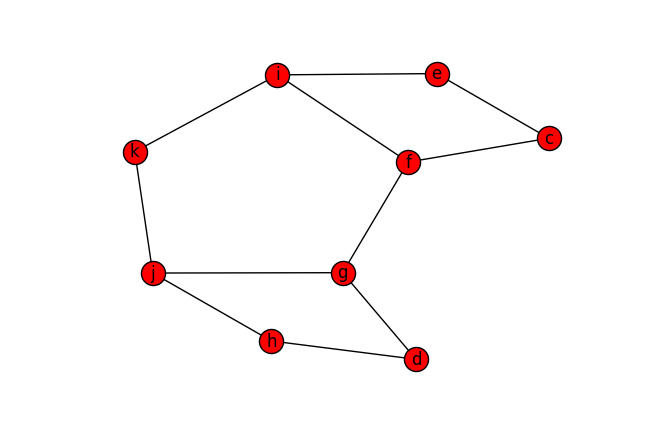

In [274]:
# Netwerk van vraag 19.8.1 fig 19.27

H= nx.Graph()
H.add_edges_from([('e','c'),('e','i'),('c','f'),('i','f'),('i','k'), ('k','j'),('f','g'),
                  ('g','d'),('g','j'),('d','h'),('j','h')])

for n in {'e','f'}:
    H.node[n]['new']=True
for n in set(H.nodes())- {'e','f'}:
    H.node[n]['new']=False
    
nx.draw_spring(H, with_labels=True)

In [276]:
def next_network(G, a=3, b=2):
    Tmp = G.copy()
    for node in G:
        if not G.node[node]['new']:
            T = [neighbor for neighbor in G.neighbors(node) if G.node[neighbor]['new']]
            if len(T) / len(G.neighbors(node)) >= b / (a + b):
                Tmp.node[node]['new'] = True
    return Tmp
    
Hi = next_network(H)

for k in Hi.nodes(k):
    print k

('c', {'new': True})
('e', {'new': True})
('d', {'new': False})
('g', {'new': False})
('f', {'new': True})
('i', {'new': True})
('h', {'new': False})
('k', {'new': False})
('j', {'new': False})


2. Implement a function `diffuse(G,a=3, b=2)` which returns a list of sets of nodes who succesively adapt to the `new` attribute. 
    * the list should not contain doubles
    * The network `G` may change after running `diffuse`. 
    * Of course you call `next_network(G,a=3, b=2)` to do the real work.

In [282]:
def different(A, B):
    return [node[0] for node in A.nodes(data=True) if node[1]['new'] != B.node[node[0]]['new']]

def diffuse_h(G, a, b, l):
    New = next_network(G, a, b)
    diff = different(New, G)
    if len(diff) > 0:
        l.append(diff)
        diffuse_h(New, a, b, l)
    return l

def diffuse(G, a=3, b=2):
    return diffuse_h(G, a, b, [])

print diffuse(H)

[['c', 'i'], ['k']]


3. Implement a function `showstopper(G,a=3, b=2)` which returns a list of clusters which cause the cascade to stop. 
    * Can you sort these clusters in such a way that the "best counterexample" comes up first?
    * Argue what "best" is. 
        * smallest, largest, easiest to "repair", .....

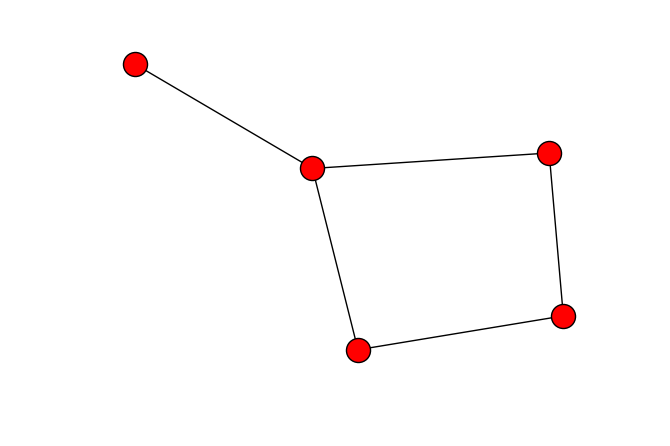

In [291]:
def showstopper(G,a=3, b=2):
    k = [item for sublist in diffuse(G) for item in sublist]
    rest = []
    for a in G.nodes():
        if a not in k:
            rest.append(a)
    big_c = max([k for k in nx.connected_components(G.subgraph(rest))], key=len)
    return G.subgraph(big_c)

# "best" is defined as the cluster with the most nodes (because in this case more nodes from the cluster
# have to be connected to nodes that have already adopted the new technology in order to continue to cascade
Show_s = showstopper(H)
nx.draw(Show_s)

4. Test your functions on network `H`, using the values of the threshold from the book. 

[('c', {'new': False}), ('e', {'new': True}), ('d', {'new': False}), ('g', {'new': False}), ('f', {'new': True}), ('i', {'new': False}), ('h', {'new': False}), ('k', {'new': False}), ('j', {'new': False})]


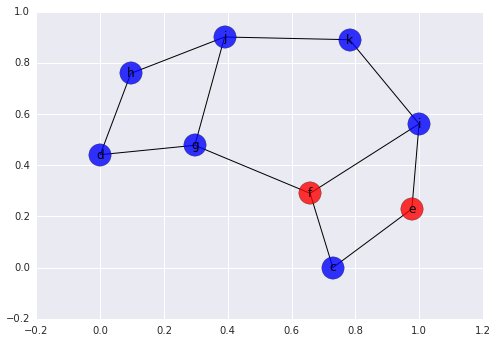

In [10]:
print H.nodes(data=True)

pos=nx.spring_layout(H) # positions for all nodes
nx.draw_networkx_nodes(H,pos,
                       nodelist=[n for n in H if H.node[n]['new']==True],
                       node_color='r',
                       node_size=500,
                   alpha=0.8 )
nx.draw_networkx_nodes(H,pos,
                       nodelist=[n for n in H if H.node[n]['new']==False],
                       node_color='b',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_edges(H,pos);
nx.draw_networkx_labels(H,pos=pos);